In [ ]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Model Analysis and Simulation/Assignment1/MNIST_digits0-1-2.csv",header=None)

In [ ]:
df.iloc[:,-1].unique()

array([0., 1., 2.])

In [ ]:
df=np.array(df)

Size of projected torch.Size([300, 3])
To Capture 99% variabce components needed are: tensor(161)


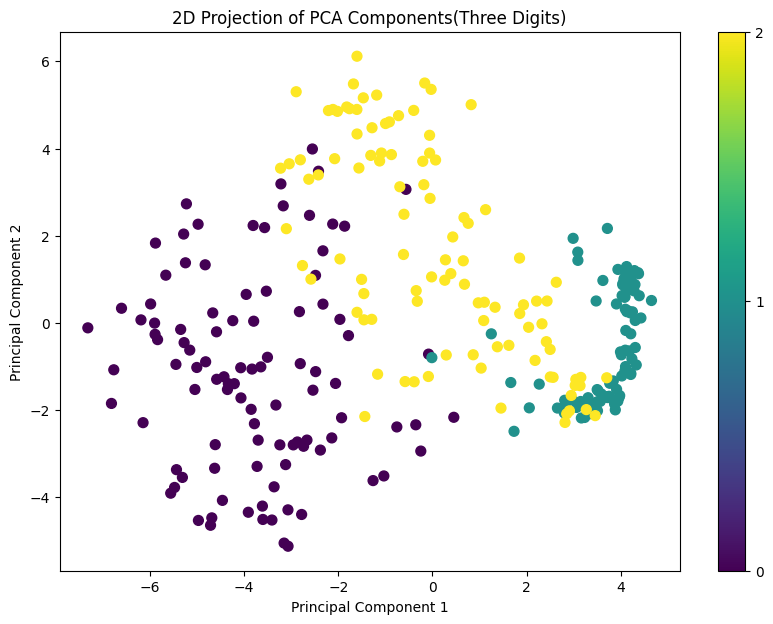

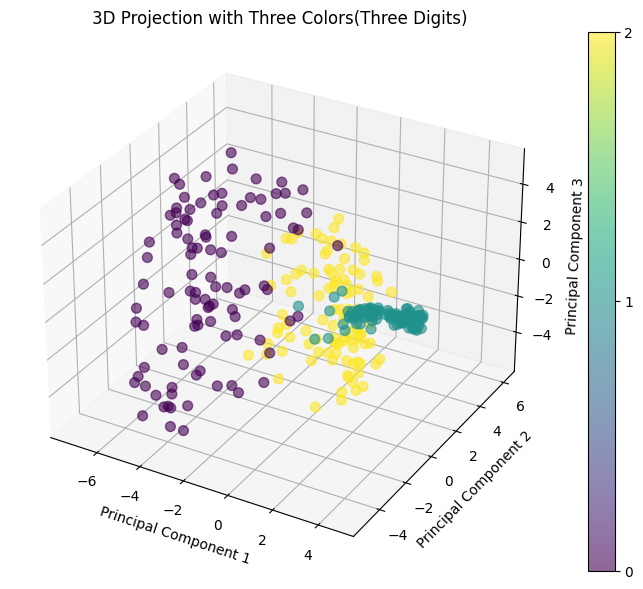

Average Reconstruction loss for Digit 0 is:  0.007771130170203578
Average Reconstruction loss for Digit 1 is:  0.004338459288088462
Average Reconstruction loss for Digit 2 is:  0.008816006706347922


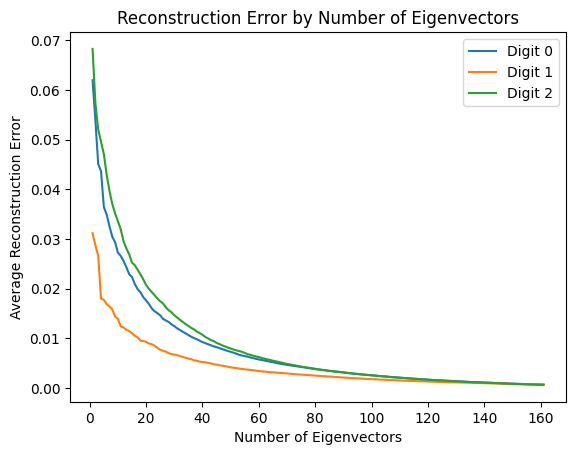

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# Assuming df is already loaded and is a numpy array
# df = ... # Load your dataset here

# Convert dataset to tensor and move to the appropriate device
df_tensor = torch.from_numpy(df) # Ensure dtype is float for PCA
device = "cuda" if torch.cuda.is_available() else "cpu"
df_tensor = df_tensor.to(device)

# Separate features and labels
x = df_tensor[:, :-1]  # Assuming the last column is the label
y = df_tensor[:, -1]   # Labels

# Center the data
x = x - torch.mean(x, dim=0)

# Calculate the covariance matrix
cov_matrix = torch.matmul(x.T, x)

# Calculate eigenvalues and eigenvectors
eigenvalues, eigenvectors = torch.linalg.eigh(cov_matrix)

# Sort eigenvalues and eigenvectors
sorted_indices = torch.argsort(eigenvalues, descending=True)
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

#projection

projected=torch.matmul(x,eigenvectors[:,0:3])
print("Size of projected",projected.shape)

# Calculate the cumulative variance
cumulative_variance = torch.cumsum(eigenvalues, dim=0) / torch.sum(eigenvalues)

# Find the number of components needed to capture 99% of the variance
components_99 = torch.searchsorted(cumulative_variance, 0.99) + 1

print("To Capture 99% variabce components needed are:",components_99)
import matplotlib.pyplot as plt

# Assuming `projected` is your data projected into 2D space
# And assuming you have a labels array `y` that corresponds to each point
plt.figure(figsize=(10, 7))
plt.scatter(projected[:, 0], projected[:, 1], c=y, cmap='viridis', s=50, alpha=1)  # Color-coded by label
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D Projection of PCA Components(Three Digits)')
plt.colorbar(ticks=[0, 1, 2])
plt.show()


# 3d Projection

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

# Assuming `projected_3d` is your data projected into 3D space with shape [299, 3]
# `y` is the column for color-coding, ensure it has values 0, 1, or 2 after any adjustment
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Perform the scatter plot and capture the output for colorbar
scatter = ax.scatter(projected[:, 0], projected[:, 1], projected[:, 2],
                     c=y, cmap='viridis', s=50, alpha=0.6)  # Assuming y is now [0, 1, 2] for colors

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.title('3D Projection with Three Colors(Three Digits)')

# Correct way to use colorbar with ticks for the unique values of y
plt.colorbar(scatter, ticks=[0, 1, 2])  # Assumes y contains values [0, 1, 2]

plt.show()


# Function to calculate reconstruction error
def reconstruction_error(x, eigenvectors, num_components):
    projection = torch.matmul(x, eigenvectors[:, :num_components])
    reconstruction = torch.matmul(projection, eigenvectors[:, :num_components].T)
    error = torch.mean((x - reconstruction) ** 2)
    return error.item()

# Calculate and plot reconstruction error for each digit class
digit_classes = torch.unique(y).int()
errors = []

for num_components in range(1, components_99 + 1):
    class_errors = []
    for digit in digit_classes:
        x_digit = x[y == digit]
        error = reconstruction_error(x_digit, eigenvectors, num_components)
        class_errors.append(error)

    errors.append(class_errors)



# Convert errors to a numpy array for plotting
errors = np.array(errors)
print("Average Reconstruction loss for Digit 0 is: ",np.mean(errors[:,0]))
print("Average Reconstruction loss for Digit 1 is: ",np.mean(errors[:,1]))
print("Average Reconstruction loss for Digit 2 is: ",np.mean(errors[:,2]))


# Plotting
for i, digit in enumerate(digit_classes):
    plt.plot(range(1, components_99 + 1), errors[:, i], label=f'Digit {digit.item()}')
plt.xlabel('Number of Eigenvectors')
plt.ylabel('Average Reconstruction Error')
plt.legend()
plt.title('Reconstruction Error by Number of Eigenvectors')
plt.show()


Mean Centering

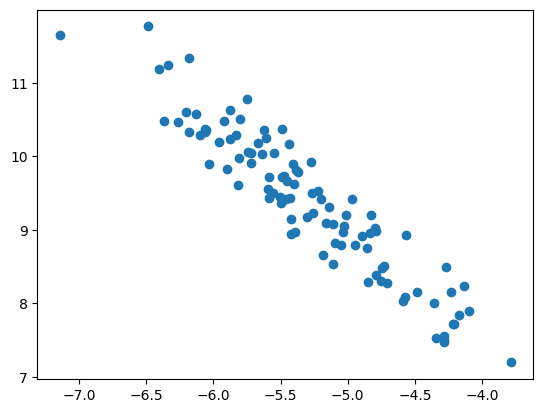

In [ ]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Transformation matrix
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]

# Generate isotropic Gaussian blobs
D, y = make_blobs(n_samples=100, centers=1, random_state=42)

# Apply the transformation to get anisotropic Gaussian blobs
X = np.dot(D, transformation)

# Plotting the anisotropic blobs
plt.scatter(X[:, 0], X[:, 1])
plt.show()


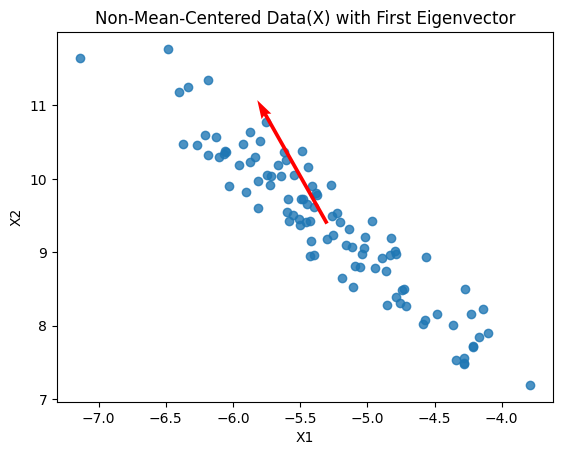

In [ ]:
# Perform PCA on the non-mean-centered data
X.shape
X_tensor=torch.from_numpy(X)
X_tensor=X_tensor.to(device)
cov_matrix_X=torch.matmul(X_tensor.T,X_tensor)
eigenvalues,eigenvectors=torch.linalg.eigh(cov_matrix_X)
eigenvectors.shape
sorted_indices = torch.argsort(eigenvalues, descending=True)
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]
projected=torch.matmul(X_tensor,eigenvectors)
projected=projected.to('cpu')
plt.scatter(X_tensor[:, 0], X_tensor[:, 1], alpha=0.8)

# Plot the first eigenvector
first_eigenvector_without_centering = eigenvectors[:,0:1]  # Scale for visibility
origin = torch.mean(X_tensor,dim=0)
#print(origin)  # Origin point for the vector
plt.quiver(*origin, *first_eigenvector_without_centering, color='r', scale=3.5)

plt.title("Non-Mean-Centered Data(X) with First Eigenvector")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()


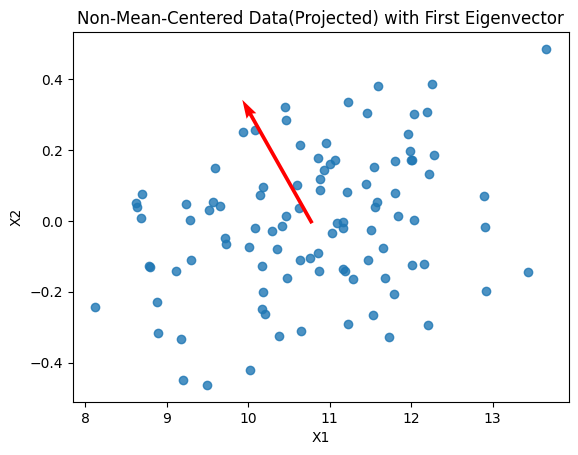

In [ ]:
# Perform PCA on the non-mean-centered data(Projected)
X.shape
X_tensor=torch.from_numpy(X)
X_tensor=X_tensor.to(device)
cov_matrix_X=torch.matmul(X_tensor.T,X_tensor)
eigenvalues,eigenvectors=torch.linalg.eigh(cov_matrix_X)
eigenvectors.shape
sorted_indices = torch.argsort(eigenvalues, descending=True)
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]
projected=torch.matmul(X_tensor,eigenvectors)
projected=projected.to('cpu')
plt.scatter(projected[:, 0], projected[:, 1], alpha=0.8)

# Plot the first eigenvector
first_eigenvector_without_centering = eigenvectors[:,0:1]  # Scale for visibility
origin = torch.mean(projected,dim=0)
#print(origin)  # Origin point for the vector
plt.quiver(*origin, *first_eigenvector_without_centering, color='r', scale=3.5)

plt.title("Non-Mean-Centered Data(Projected) with First Eigenvector")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()


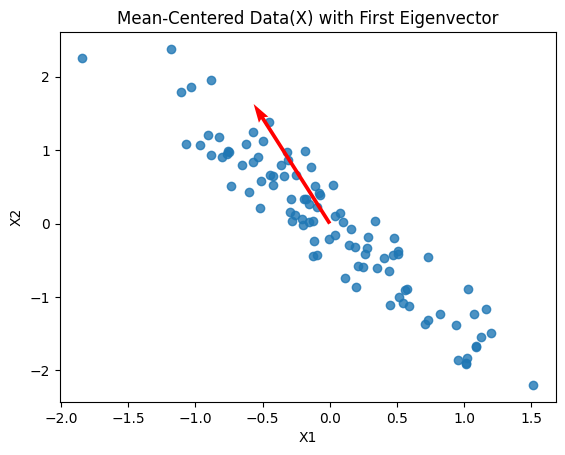

In [ ]:


# Perform PCA on the mean-centered data
X.shape
X_tensor=torch.from_numpy(X)
X_tensor=X_tensor.to(device)
X_tensor=X_tensor-torch.mean(X_tensor,dim=0)
cov_matrix_X=torch.matmul(X_tensor.T,X_tensor)
eigenvalues,eigenvectors=torch.linalg.eigh(cov_matrix_X)
eigenvectors.shape
sorted_indices = torch.argsort(eigenvalues, descending=True)
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]
projected=torch.matmul(X_tensor,eigenvectors)
projected=projected.to('cpu')
plt.scatter(X_tensor[:, 0], X_tensor[:, 1], alpha=0.8)

# Plot the first eigenvector
first_eigenvector_with_centering = eigenvectors[:,0:1]  # Scale for visibility
origin = torch.mean(X_tensor,dim=0)
#print(origin)  # Origin point for the vector
plt.quiver(*origin, *first_eigenvector_with_centering, color='r', scale=3.5)

plt.title("Mean-Centered Data(X) with First Eigenvector")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()


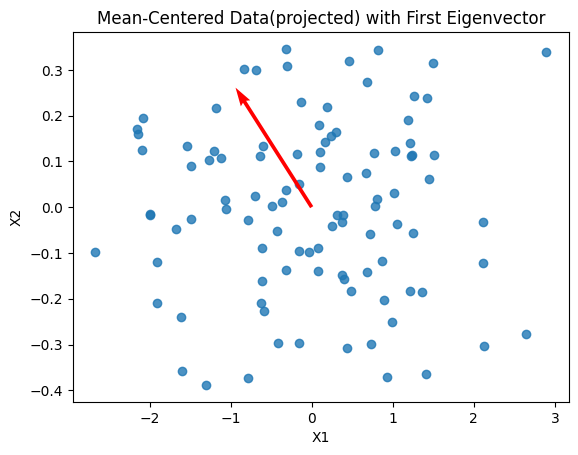

In [ ]:


# Perform PCA on the mean-centered(projected) data
X.shape
X_tensor=torch.from_numpy(X)
X_tensor=X_tensor.to(device)
X_tensor=X_tensor-torch.mean(X_tensor,dim=0)
cov_matrix_X=torch.matmul(X_tensor.T,X_tensor)
eigenvalues,eigenvectors=torch.linalg.eigh(cov_matrix_X)
eigenvectors.shape
sorted_indices = torch.argsort(eigenvalues, descending=True)
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]
projected=torch.matmul(X_tensor,eigenvectors)
projected=projected.to('cpu')
plt.scatter(projected[:, 0], projected[:, 1], alpha=0.8)

# Plot the first eigenvector
first_eigenvector_with_centering = eigenvectors[:,0:1]  # Scale for visibility
origin = torch.mean(projected,dim=0)
#print(origin)  # Origin point for the vector
plt.quiver(*origin, *first_eigenvector_with_centering, color='r', scale=3.5)

plt.title("Mean-Centered Data(projected) with First Eigenvector")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()


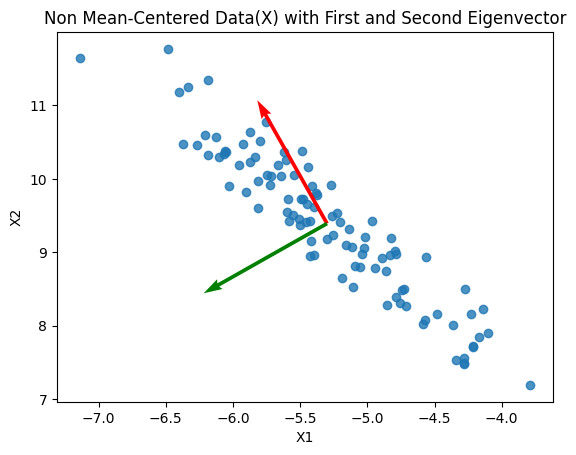

In [ ]:
# Perform PCA on the non-mean-centered data
X.shape
X_tensor=torch.from_numpy(X)
X_tensor=X_tensor.to(device)

cov_matrix_X=torch.matmul(X_tensor.T,X_tensor)
eigenvalues,eigenvectors=torch.linalg.eigh(cov_matrix_X)
eigenvectors.shape
sorted_indices = torch.argsort(eigenvalues, descending=True)
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]
projected=torch.matmul(X_tensor,eigenvectors)
projected=projected.to('cpu')
plt.scatter(X_tensor[:, 0], X_tensor[:, 1], alpha=0.8)

# Plot the first eigenvector
first_eigenvector_non_centered = eigenvectors[:,0:1]
s_eigenvector_non_centered = eigenvectors[:,1:2]   # Scale for visibility
origin = torch.mean(X_tensor,dim=0)
#print(origin)  # Origin point for the vector
plt.quiver(*origin, *first_eigenvector_non_centered, color='r', scale=3.5)
plt.quiver(*origin, *s_eigenvector_non_centered, color='g', scale=3.5)

plt.title("Non Mean-Centered Data(X) with First and Second Eigenvector")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()


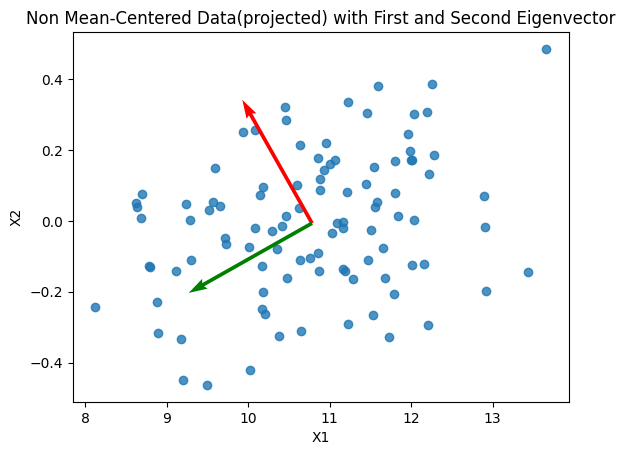

In [ ]:
# Perform PCA on the non-mean-centered(projected) data
X.shape
X_tensor=torch.from_numpy(X)
X_tensor=X_tensor.to(device)

cov_matrix_X=torch.matmul(X_tensor.T,X_tensor)
eigenvalues,eigenvectors=torch.linalg.eigh(cov_matrix_X)
eigenvectors.shape
sorted_indices = torch.argsort(eigenvalues, descending=True)
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]
projected=torch.matmul(X_tensor,eigenvectors)
projected=projected.to('cpu')
plt.scatter(projected[:, 0], projected[:, 1], alpha=0.8)

# Plot the first eigenvector
first_eigenvector_non_centered = eigenvectors[:,0:1]
s_eigenvector_non_centered = eigenvectors[:,1:2]   # Scale for visibility
origin = torch.mean(projected,dim=0)
#print(origin)  # Origin point for the vector
plt.quiver(*origin, *first_eigenvector_non_centered, color='r', scale=3.5)
plt.quiver(*origin, *s_eigenvector_non_centered, color='g', scale=3.5)

plt.title("Non Mean-Centered Data(projected) with First and Second Eigenvector")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()


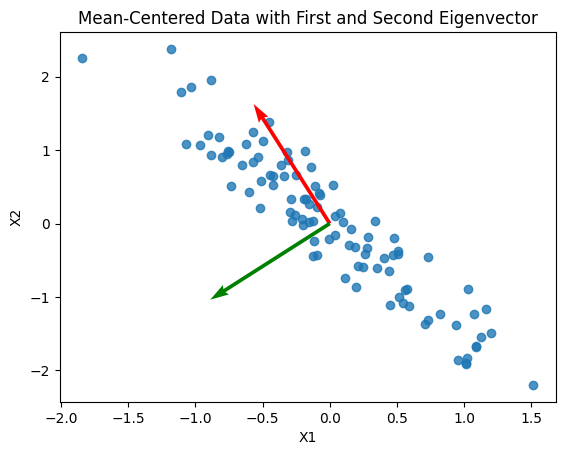

In [ ]:


# Perform PCA on the mean-centered data
X.shape
X_tensor=torch.from_numpy(X)
X_tensor=X_tensor.to(device)
X_tensor=X_tensor-torch.mean(X_tensor,dim=0)
cov_matrix_X=torch.matmul(X_tensor.T,X_tensor)
eigenvalues,eigenvectors=torch.linalg.eigh(cov_matrix_X)
eigenvectors.shape
sorted_indices = torch.argsort(eigenvalues, descending=True)
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]
projected=torch.matmul(X_tensor,eigenvectors)
projected=projected.to('cpu')
plt.scatter(X_tensor[:, 0], X_tensor[:, 1], alpha=0.8)

# Plot the first eigenvector
first_eigenvector_centered = eigenvectors[:,0:1]
s_eigenvector_centered = eigenvectors[:,1:2]   # Scale for visibility
origin = torch.mean(projected,dim=0)
#print(origin)  # Origin point for the vector
plt.quiver(*origin, *first_eigenvector_centered, color='r', scale=3.5)
plt.quiver(*origin, *s_eigenvector_centered, color='g', scale=3.5)

plt.title("Mean-Centered Data with First and Second Eigenvector")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()


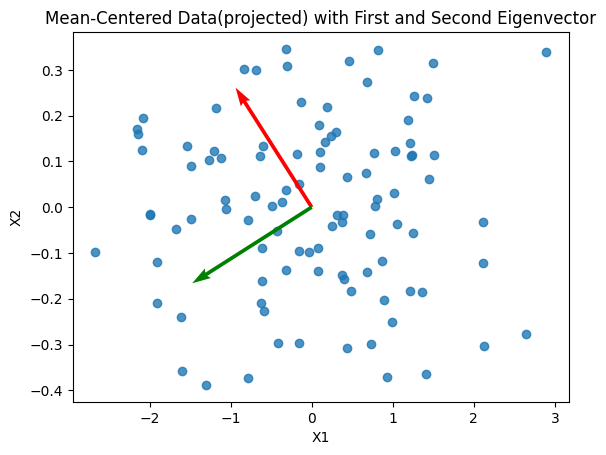

In [ ]:


# Perform PCA on the mean-centered data
X.shape
X_tensor=torch.from_numpy(X)
X_tensor=X_tensor.to(device)
X_tensor=X_tensor-torch.mean(X_tensor,dim=0)
cov_matrix_X=torch.matmul(X_tensor.T,X_tensor)
eigenvalues,eigenvectors=torch.linalg.eigh(cov_matrix_X)
eigenvectors.shape
sorted_indices = torch.argsort(eigenvalues, descending=True)
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]
projected=torch.matmul(X_tensor,eigenvectors)
projected=projected.to('cpu')
plt.scatter(projected[:, 0], projected[:, 1], alpha=0.8)

# Plot the first eigenvector
first_eigenvector_centered = eigenvectors[:,0:1]
s_eigenvector_centered = eigenvectors[:,1:2]   # Scale for visibility
origin = torch.mean(projected,dim=0)
#print(origin)  # Origin point for the vector
plt.quiver(*origin, *first_eigenvector_centered, color='r', scale=3.5)
plt.quiver(*origin, *s_eigenvector_centered, color='g', scale=3.5)

plt.title("Mean-Centered Data(projected) with First and Second Eigenvector")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()
